### Team ID : PNT2022TMID32168

# Building a Regression Model

 ## 1. Download the dataset:

In [140]:
# yes completed.....

In [15]:
# importing the modules...

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Load the dataset into the tool.

In [16]:
df=pd.read_csv("C:\\Users\\Mytheswaran\\IBM\\abalone.csv")
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [17]:
# shape
df.shape

(4177, 9)

#### Additional Task

#### Convert Ring column into Age column (by adding 1.5)

In [18]:
Age = 2.0 + df.Rings
df["Age"] = Age
df = df.drop(columns=["Rings"],axis=1)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,17.0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,9.0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,11.0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,12.0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,9.0


## 3. Perform Below Visualizations.

## • Univariate Analysis

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


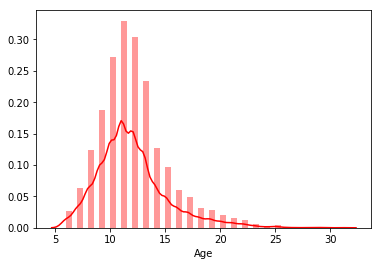

In [77]:
#univarient Analysis
# Choosing Balance column
sns.distplot(df.Age,color='Red')

## •Bi-Variate Analysis

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


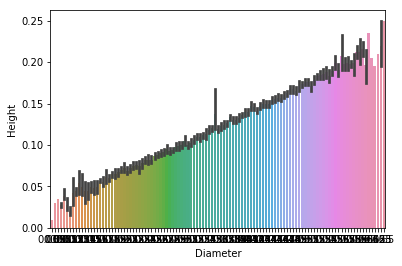

In [54]:
#bivariate analysis 

sns.barplot(x=df.Diameter,y=df.Height)    # Choosing Age and Height column

## • Multi-Variate Analysis

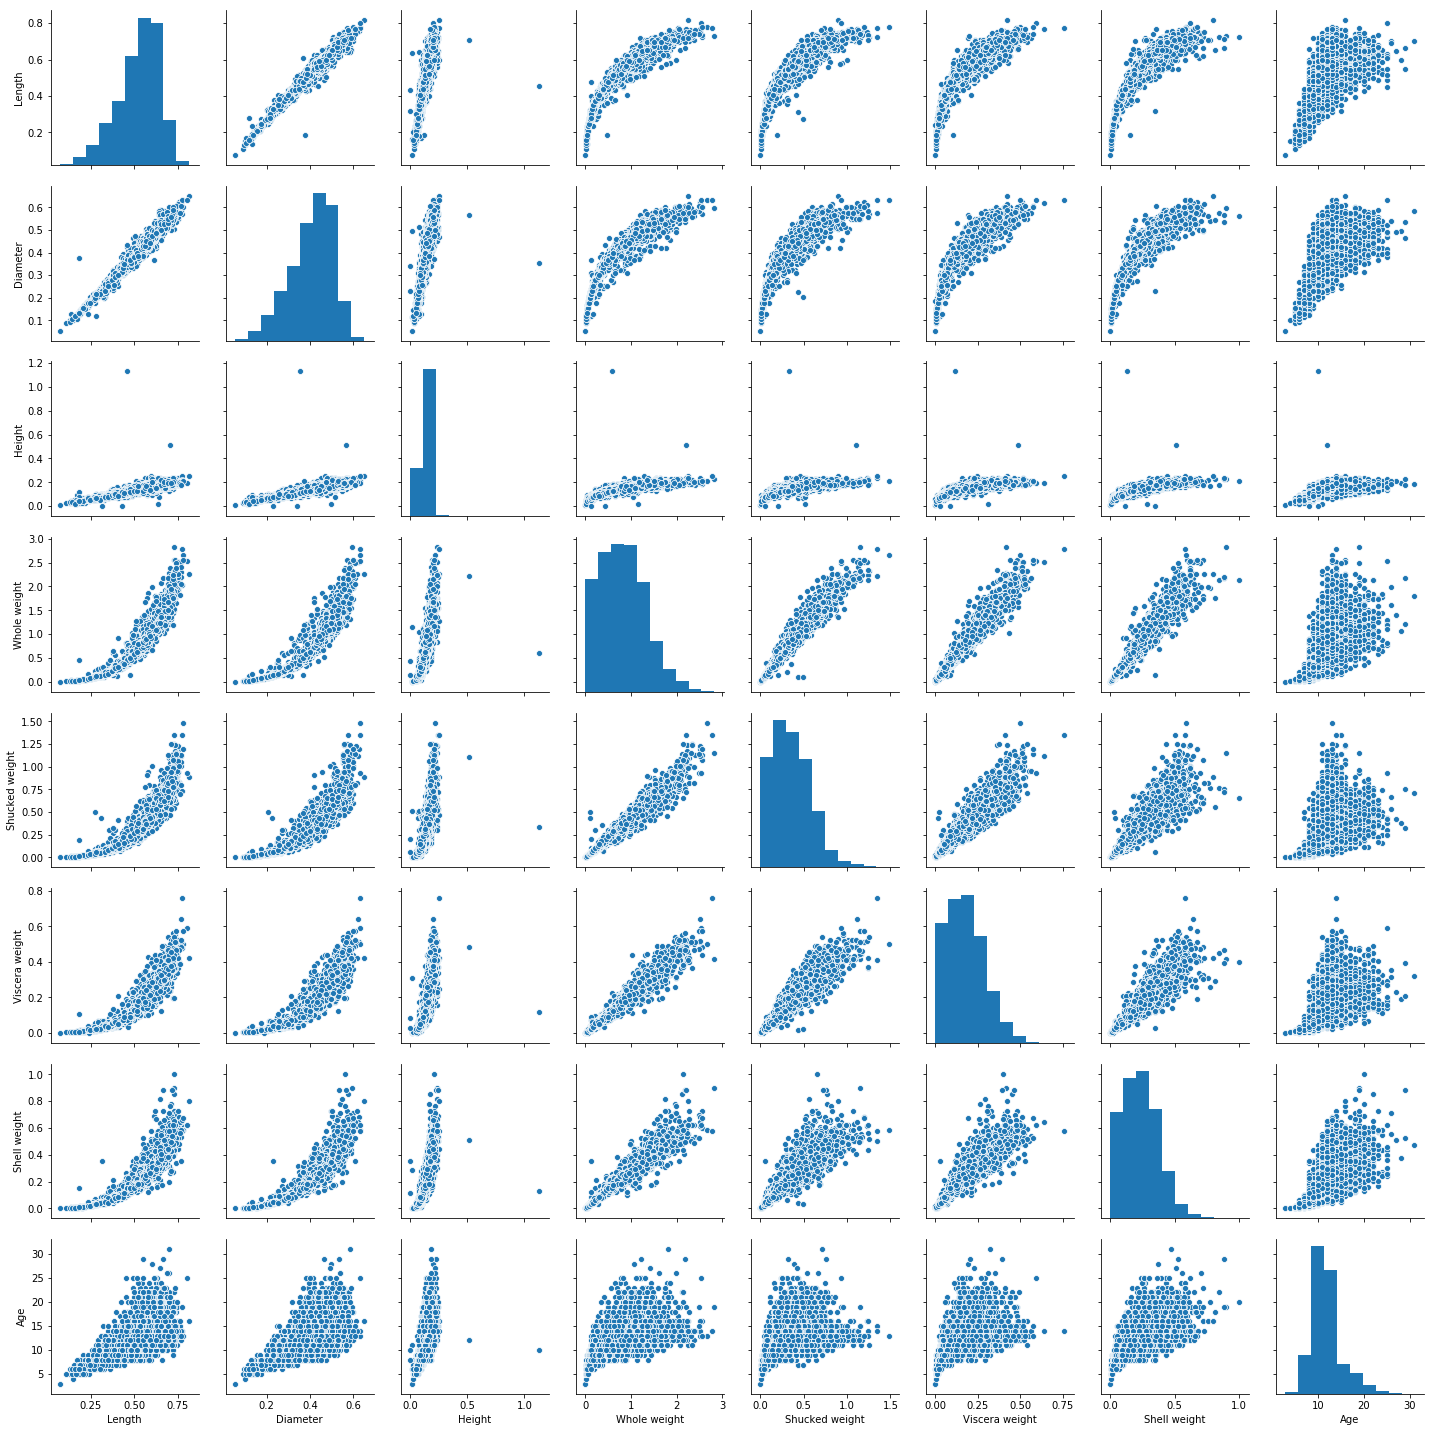

In [22]:
# Multi-Variate Analysis

sns.pairplot(df)

## 4. Perform descriptive statistics on the dataset.

In [23]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,3.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,10.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,11.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,13.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,31.000000


## 5. Check for Missing values and deal with them.

In [24]:
df.isnull().any()      # to check any null 

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Age               False
dtype: bool

In [25]:
df.isnull().sum()      # to check the count of null  

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64

In [26]:
# there is no missing values so we go for next step.....

## 6. Find the outliers and replace them outliers

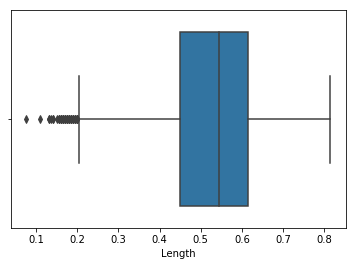

In [71]:
# outlier in Age column

sns.boxplot(df.Length)

In [69]:
outliers=df.quantile(q=(0.25,0.75))
outliers

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0.25,0.0,0.450,0.35,0.115,0.4415,0.186,0.0935,0.130,10.0
0.75,2.0,0.615,0.48,0.165,1.1530,0.502,0.2530,0.329,13.0


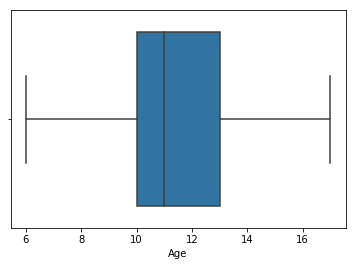

In [29]:
q1=df.Age.quantile(0.25)  #(Q1)           # Replacement using median....
q3=df.Age.quantile(0.75)  #(Q3)

IQR=q3-q1

upper_limit= q3 + 1.5*IQR
lower_limit= q1 - 1.5*IQR

df['Age']= np.where(df['Age']<lower_limit,7,df['Age'])
sns.boxplot(x=df.Age,showfliers=False)

## 7. Check for Categorical columns and perform encoding

## • Label encoding

In [30]:
from sklearn.preprocessing import LabelEncoder        # Using Label encoding....
le=LabelEncoder()

df.Sex=le.fit_transform(df.Sex)

df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,17.0
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,9.0
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,11.0
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,12.0
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,9.0


## 8. Split the data into dependent and independent variables.

## ( i ) Independent variable

In [31]:
x=df.drop(columns=['Sex'],axis = 1)
x.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,17.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,9.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,11.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,12.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,9.0


## ( ii ) Dependent variable

In [32]:
y = df.Sex
y.head()

0    2
1    2
2    0
3    2
4    1
Name: Sex, dtype: int64

## 9. Scale the independent variables

In [33]:
from sklearn.preprocessing import scale
X_Scaled = pd.DataFrame(scale(x), columns=x.columns)
X_Scaled.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.576999
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.917533
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.293900
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.017916
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.917533


## 10. Split the data into training and testing

In [34]:
# train test split

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Scaled, y, test_size=0.2, random_state=0)

In [35]:
X_Train.shape

(3341, 8)

In [36]:
X_Test.shape

(836, 8)

In [37]:
Y_Train.shape

(3341,)

In [38]:
Y_Test.shape

(836,)

## 11. Build the Model

In [78]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10,criterion='entropy')

In [79]:
model.fit(X_Train,Y_Train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [41]:
y_predict = model.predict(X_Test)

In [42]:
y_predict_train = model.predict(X_Train)

## 12. Train the Model

In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [44]:
print('Training accuracy: ',accuracy_score(Y_Train,y_predict_train))

Training accuracy:  0.98263992816522


## 13. Test the Model

In [45]:
print('Testing accuracy: ',accuracy_score(Y_Test,y_predict))

Testing accuracy:  0.5251196172248804


## 14. Measure the performance using Metrics

In [46]:
pd.crosstab(Y_Test,y_predict)

col_0,0,1,2
Sex,,,
0,119,26,104
1,42,209,40
2,126,59,111


In [47]:
print(classification_report(Y_Test,y_predict))

             precision    recall  f1-score   support

          0       0.41      0.48      0.44       249
          1       0.71      0.72      0.71       291
          2       0.44      0.38      0.40       296

avg / total       0.53      0.53      0.52       836

